Use this notebook for a quick start to the project. When a question is finished, extract it to multiple function callable from the website

## Question 3

How the top composers' career progress over the years ?

In [3]:
import matplotlib.pyplot as plt

# Import all needed libraries
from question3 import *
# Load autoreload extension
%load_ext autoreload

# Set autoreload mode
%autoreload 2

In [88]:
movie_renamed = prepare_data_for_q3()

display(movie_renamed.head())
print(movie_renamed.shape)

,release_date,composers,box_office_revenue
0,2009,"[Composer(id=1729, name='James Horner', birthd...",2.782275e+09
1,1997,"[Composer(id=1729, name='James Horner', birthd...",2.185372e+09
2,2012,"[Composer(id=37, name='Alan Silvestri', birthd...",1.511758e+09
3,2011,"[Composer(id=2949, name='Alexandre Desplat', b...",1.328111e+09
4,2013,"[Composer(id=6041, name='Brian Tyler', birthda...",1.215577e+09


(7966, 3)


,release_year,composer,box_office_revenue
0,2009,"Composer(id=1729, name='James Horner', birthda...",2.782275e+09
1,1997,"Composer(id=1729, name='James Horner', birthda...",2.185372e+09
2,2012,"Composer(id=37, name='Alan Silvestri', birthda...",1.511758e+09
3,2011,"Composer(id=2949, name='Alexandre Desplat', bi...",1.328111e+09
4,2013,"Composer(id=6041, name='Brian Tyler', birthday...",1.215577e+09


(9129, 3)


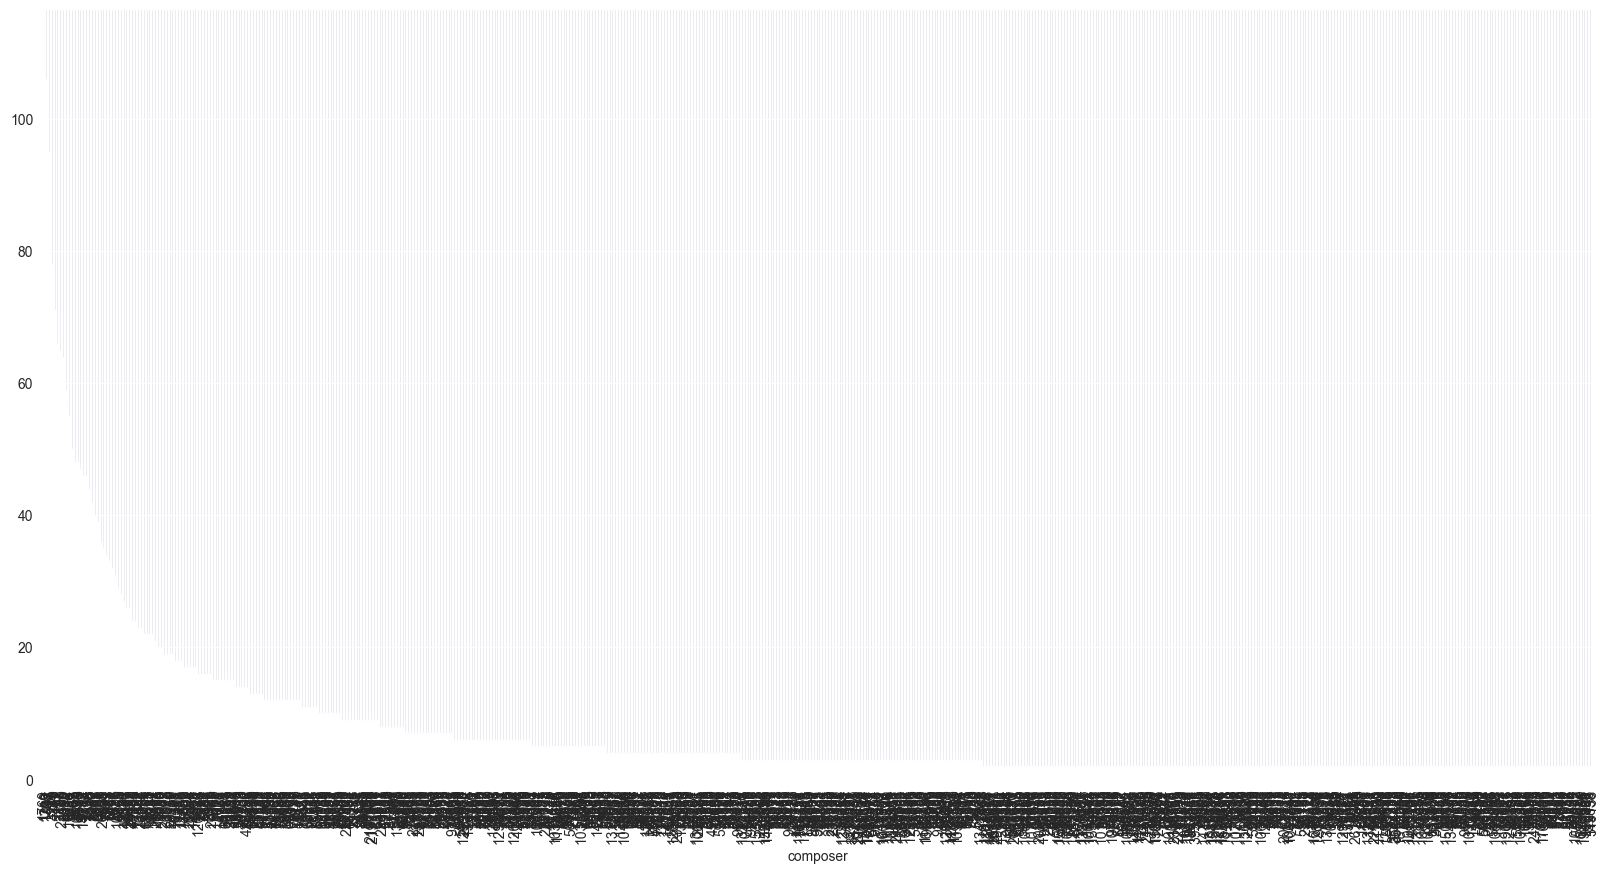

In [92]:
movie_grouped_by_composer = group_by_composer_id(movie_renamed)

# Don't show the composer with only one movie
movie_grouped_by_composer = movie_grouped_by_composer.filter(lambda x: len(x) > 1)

# Plot the number of movies per composer
movie_grouped_by_composer['composer'].value_counts().plot(kind='bar', figsize=(20, 10))
plt.show()

Index([1760], dtype='int64', name='composer')


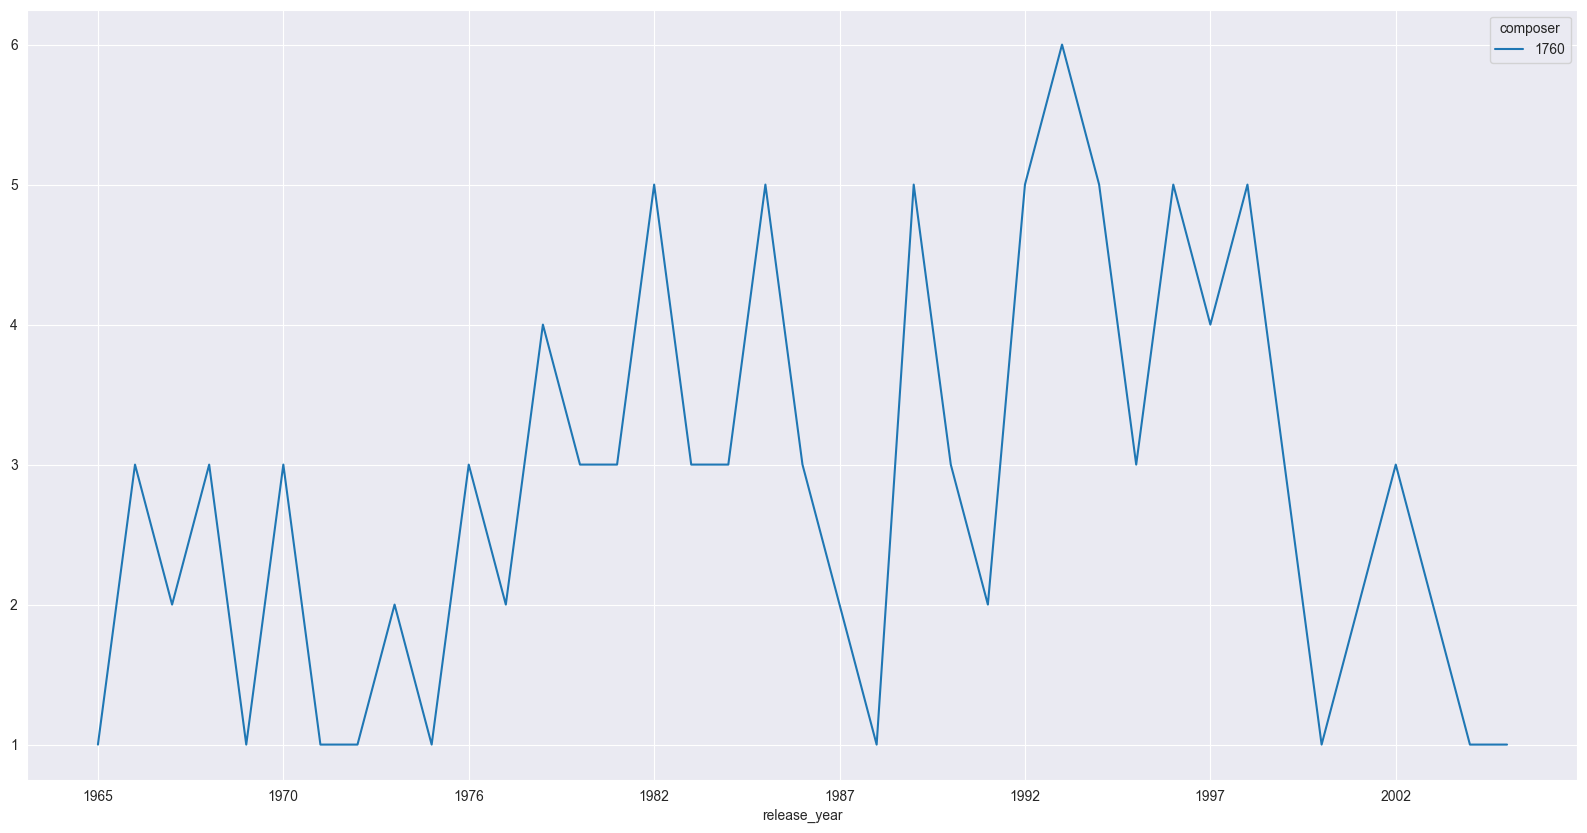

In [93]:
movie_grouped_by_top_composer = filter_by_top_composers(movie_grouped_by_composer, 1)

# Plot the evolution of the number of movies per year for the top 25 composers
movie_grouped_by_composer_and_year = movie_grouped_by_top_composer.groupby(['composer', 'release_year'])
movie_grouped_by_composer_and_year['composer'].value_counts().unstack(0).plot(figsize=(20, 10))
plt.show()

<Axes: xlabel='release_year'>

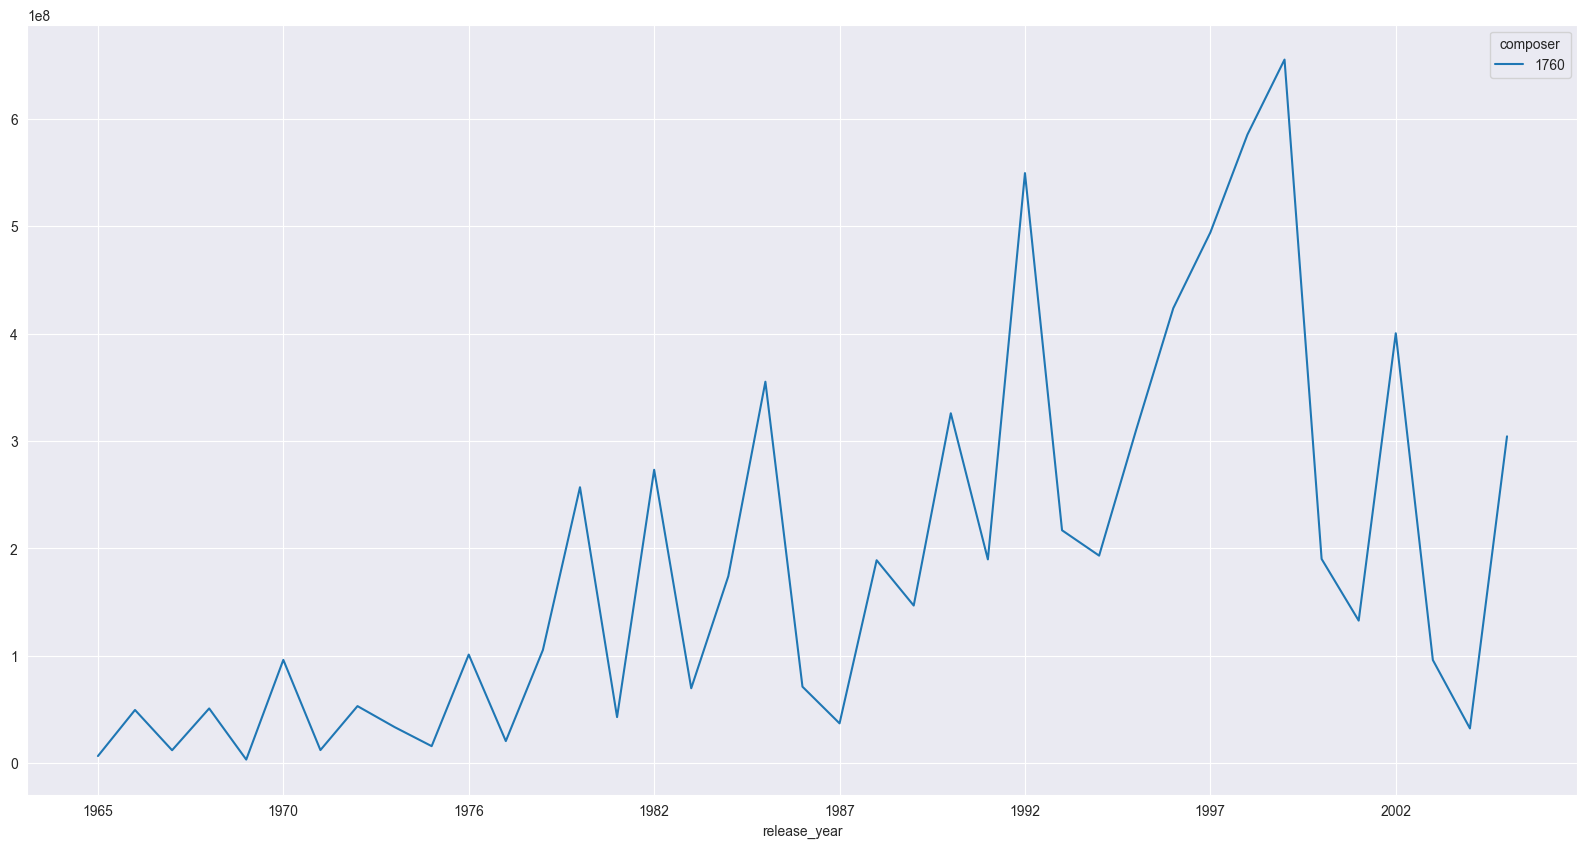

In [95]:
# Plot the evolution of the revenue for the film per year for the top composers
movie_grouped_by_composer_and_year['box_office_revenue'].sum().unstack(0).plot(figsize=(20, 10))